In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline     

In [2]:
trafficdata=pd.read_excel("D:/analytics/Predictive_Analysis2/IOT_Time_Series_Analysis\Mckinsey Traffic Data Hackathon/TRaffic prediction Mckinsey.xlsx")

In [39]:
trafficdata.head()

,Junction,Vehicles,Year,Month,Week,Weekdays,Hour
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,0,11,44,6,0
2015-11-01 01:00:00,1,13,0,11,44,6,1
2015-11-01 02:00:00,1,10,0,11,44,6,2
2015-11-01 03:00:00,1,7,0,11,44,6,3
2015-11-01 04:00:00,1,9,0,11,44,6,4


In [4]:
trafficdata.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

In [5]:
trafficdata['Year']=trafficdata["DateTime"].apply(lambda x:x.year)  
trafficdata['Month']=trafficdata["DateTime"].apply(lambda x:x.month)
trafficdata['Week']=trafficdata["DateTime"].apply(lambda x:x.week)
trafficdata['Weekdays']=trafficdata["DateTime"].apply(lambda x:x.weekday())
trafficdata['Hour']=trafficdata["DateTime"].apply(lambda x:x.hour)
#split the year/month/week for weeekday use weekday()

In [6]:
trafficdata.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Weekdays,Hour
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,6,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,6,2
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,6,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,6,4


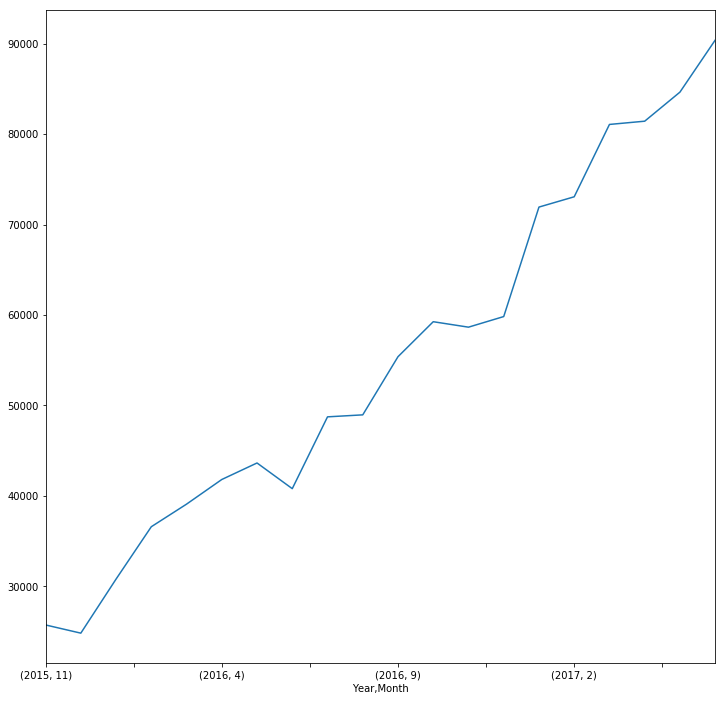

In [7]:
trafficdata.groupby([trafficdata['Year'],'Month'])['Vehicles'].sum().plot(figsize=(12,12))

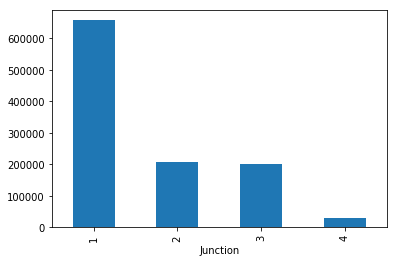

In [8]:
trafficdata.Vehicles.groupby(trafficdata['Junction']).sum().plot(kind="bar")

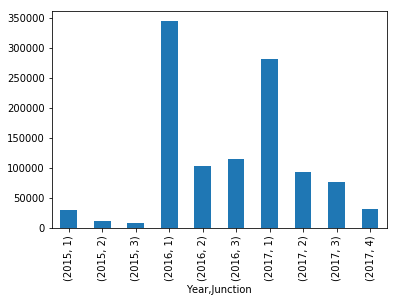

In [9]:
trafficdata.groupby(['Year','Junction'])['Vehicles'].sum().plot(kind="bar")

In [10]:
from pandas import Series 

In [11]:
trafficdata.index=trafficdata["DateTime"]

In [12]:
trafficdata.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Weekdays,Hour
DateTime,,,,,,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,6,0
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,6,1
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,6,2
2015-11-01 03:00:00,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,6,3
2015-11-01 04:00:00,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,6,4


In [13]:
del trafficdata["DateTime"],trafficdata["ID"]

In [14]:
trafficdata.head()

,Junction,Vehicles,Year,Month,Week,Weekdays,Hour
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,44,6,0
2015-11-01 01:00:00,1,13,2015,11,44,6,1
2015-11-01 02:00:00,1,10,2015,11,44,6,2
2015-11-01 03:00:00,1,7,2015,11,44,6,3
2015-11-01 04:00:00,1,9,2015,11,44,6,4


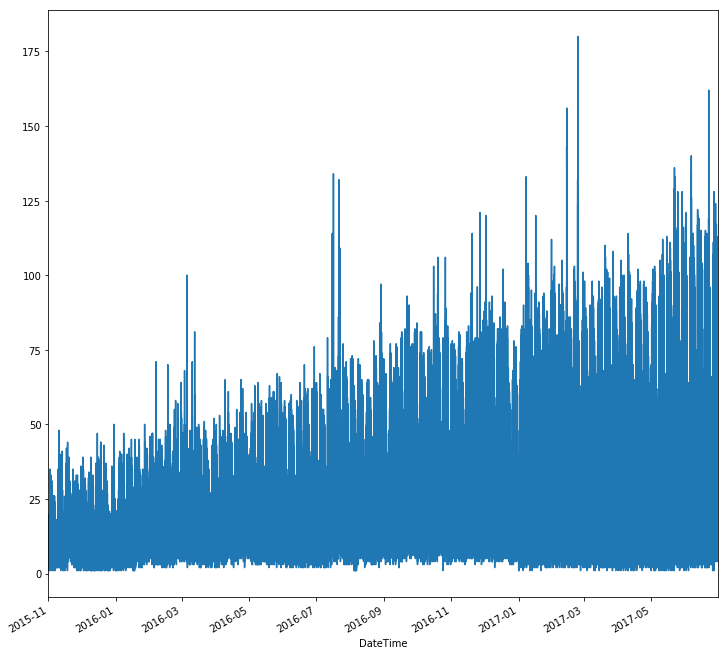

In [15]:
trafficdata['2015-11':'2017-06']['Vehicles'].plot(figsize=(12,12))  # to check wether TS has worked or not

In [16]:
from statsmodels.tsa.stattools import adfuller   #for dicky fuller test

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
adfuller(trafficdata.Vehicles)

(-7.5182781119357029,
 3.8510601999160059e-11,
 57,
 48062,
 {'1%': -3.4304860669404431,
  '10%': -2.5668020098715272,
  '5%': -2.8616001387397922},
 276495.72182130534)

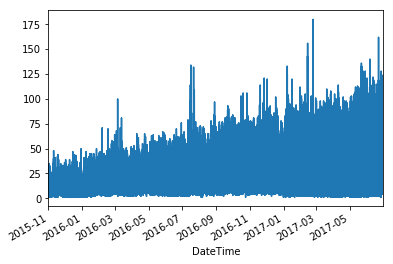

In [18]:
trafficdata.Vehicles.plot()

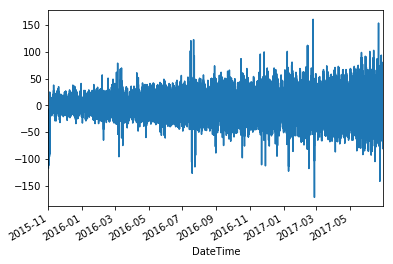

In [19]:
trafficdata.Vehicles.diff(57).plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

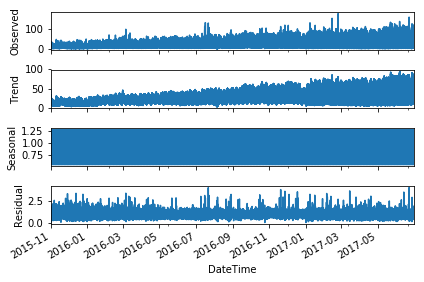

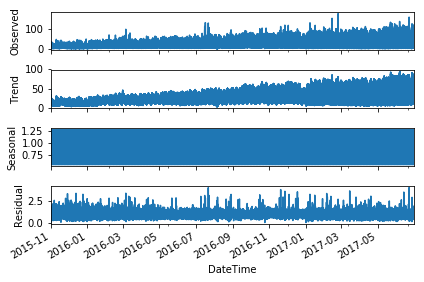

In [21]:
seasonal_decompose(trafficdata.Vehicles,model="multiplicative",freq=24).plot()

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

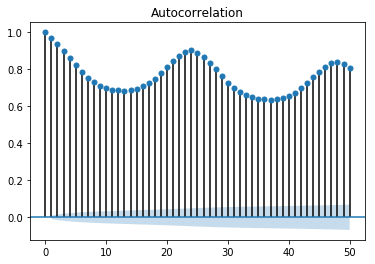

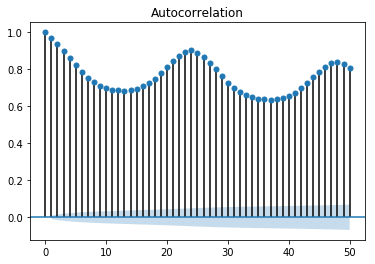

In [23]:
plot_acf(trafficdata.Vehicles,lags=50)  # if we dnt get any lags in acf go with sarimax


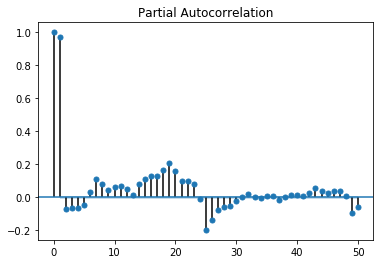

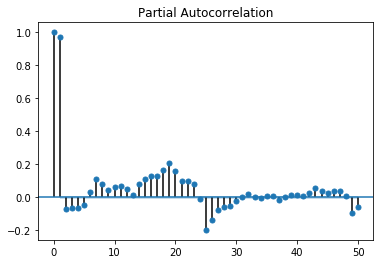

In [24]:
plot_pacf(trafficdata.Vehicles,lags=50)

In [25]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [27]:
p=d=q=range(0,3)                                #to find out pdq automaticallynand see the results which have least AIC that is our pdq values
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(np.array(trafficdata.Vehicles,dtype=float),order=param)
        results=mod.fit()
        print('ARIMA{}-AIC:{}'.format(param,results.aic))
    except:
        continue

ARIMA(0, 0, 0)-AIC:428414.18517738336
ARIMA(0, 0, 1)-AIC:377028.24222665565
ARIMA(0, 1, 0)-AIC:293056.61268585426
ARIMA(0, 1, 1)-AIC:292937.29981722106
ARIMA(0, 1, 2)-AIC:292845.11617511674
ARIMA(0, 2, 0)-AIC:323809.20826651173
ARIMA(0, 2, 1)-AIC:293065.05953153863


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)-AIC:292945.87627309386
ARIMA(1, 0, 0)-AIC:292339.0253071082
ARIMA(1, 0, 1)-AIC:292141.0009285206
ARIMA(1, 0, 2)-AIC:291978.94154434896
ARIMA(1, 1, 0)-AIC:292925.9803959358
ARIMA(1, 1, 1)-AIC:290791.1300461098
ARIMA(1, 1, 2)-AIC:290323.2625404181
ARIMA(1, 2, 0)-AIC:310051.61810862226
ARIMA(2, 0, 0)-AIC:292114.7071024026
ARIMA(2, 0, 1)-AIC:290797.86077795445
ARIMA(2, 0, 2)-AIC:290329.7661484815
ARIMA(2, 1, 0)-AIC:292819.6409627801
ARIMA(2, 1, 1)-AIC:290207.40934346523
ARIMA(2, 1, 2)-AIC:286203.8406807927
ARIMA(2, 2, 0)-AIC:304475.46897916985


In [26]:
model=ARIMA(np.array(trafficdata.Vehicles,dtype=float),order=(2,1,2),freq="H")

In [27]:
result=model.fit()

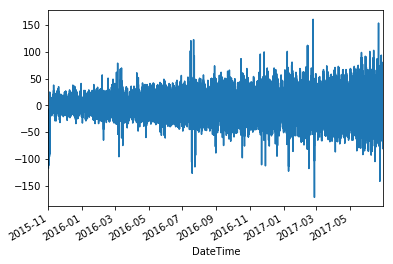

In [28]:
trafficdata.Vehicles.diff(57).plot(kind="line")

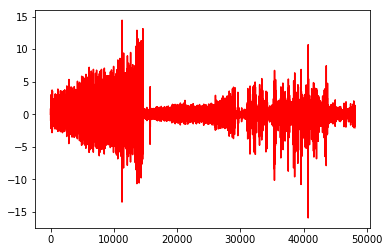

In [29]:
plt.plot(result.fittedvalues,color="red") #if the model is fitted both graph should be same, hence model is not fitted

In [ ]:
# since ARIMA is failed now use SARIMAX model 

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
model2=SARIMAX(endog=trafficdata.Vehicles,order=(2,1,2),seasonal_order=(2,1,2,24),trend='c',enforce_invertibility=False,enforce_stationary=False)

In [39]:
result2=model2.fit()

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

In [30]:
from sklearn.neural_network import MLPRegressor

In [31]:
trafficdata["Year"][trafficdata['Year']==2015]=0
trafficdata["Year"][trafficdata['Year']==2016]=1
trafficdata["Year"][trafficdata['Year']==2017]=2

In [32]:
y=trafficdata.Vehicles
x=trafficdata[['Junction','Year','Month','Week','Weekdays','Hour']]

In [33]:
neuralnet =MLPRegressor(hidden_layer_sizes=(5,5),activation='relu')

In [34]:
neuralnetmodel=neuralnet.fit(x,y)

In [35]:
neuralnetmodel.score(x,y)

0.82580205375922378

In [36]:
neuralpredict=neuralnetmodel.predict(x)

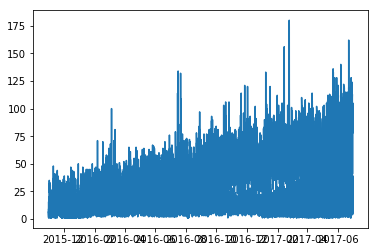

In [37]:
plt.plot(y)